In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

X_train = pd.read_csv(r'../data/train_data.csv')
Y_train = X_train["Category"]

X_test = pd.read_csv(r'../data/test_data.csv')
Y_test = X_test["Category"]
X_train= X_train.iloc[:, [i for i in range(13,28)]+ [7,8,9]]
X_test= X_test.iloc[:, [i for i in range(13,28)]+ [7,8,9]]

In [2]:
model = RandomForestClassifier(n_estimators=10,max_depth=10, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [3]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [4]:
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9565217391304348
Classification Report:
                  precision    recall  f1-score   support

non-prolaktinom       1.00      0.95      0.97        79
    prolaktinom       0.76      1.00      0.87        13

       accuracy                           0.96        92
      macro avg       0.88      0.97      0.92        92
   weighted avg       0.97      0.96      0.96        92

Confusion Matrix:
 [[75  4]
 [ 0 13]]


In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y_test)

In [6]:
fpr, tpr, thresholds = roc_curve(y_encoded, y_pred_prob)
auc = roc_auc_score(y_encoded, y_pred_prob)

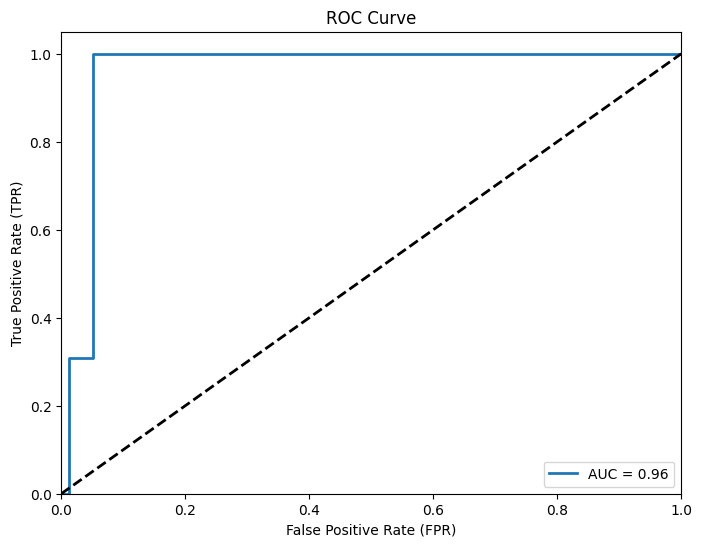

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
